In [115]:
%run Frame_analysis_functions.py
import joblib
import seaborn as sns

In [2]:
all_df = pd.read_csv('Results/All_speeches_labelled.csv')
all_df = all_df.loc[all_df.party_y != 'I']

combinations = []
for year in range(1983,2017):
    for topic in all_df.dynamic_label.unique():
        combinations.append((year,topic))

In [95]:
def run_similarity(year,topic,binary=True):
    """
    run analysis for a given year and topic
    
    args:
        - year: year to subset speeches
        - topic: topic to subset speeches
        - binary: if True, 1 for speech containing word else frequency within speech
    returns:
        - dictionary containing summary statistics and correlation dataframe
    """
    
    # subset speeches
    sub_df = all_df.loc[(all_df.year_y == year) & (all_df.dynamic_label == topic)]

    if len(sub_df) > 0:

        DTM = make_DTM(sub_df,binary=binary,remove_speaker=False) # Make DTM
        speakers = DTM['speaker']
        DTM = DTM.drop('speaker',1)
        
        term_df = chiSq_df(DTM) # Make Chi_square frequency table
        pre_drop_terms = DTM.columns[:-1] # record keeping

        # remove low value chi square terms
        term_df = term_df.sort_values(by='chi2',ascending=False)
        drop_cols = list(term_df['terms'][200:])
        DTM = DTM.drop(drop_cols,1)
        term_df = term_df.head(200)
        
        DTM_R = DTM.loc[DTM.party_y == 'R']
        DTM_D = DTM.loc[DTM.party_y == 'D']
        
        return DTM, term_df.terms


In [102]:
x,y = run_similarity(1999,'taxes')

In [103]:
xd = x.loc[x.party_y == 'D'].drop('party_y',1)
xr = x.loc[x.party_y == 'R'].drop('party_y',1)

In [113]:
xdn = xd.to_numpy()
similarity_mat = np.zeros([xdn.shape[0],xdn.shape[0]])
for i in range(xdn.shape[0]):
    for j in range(xdn.shape[0]):
        similarity_mat[i,j] = 1 - cosine(xdn[i,:],xdn[j,:])

<AxesSubplot:>

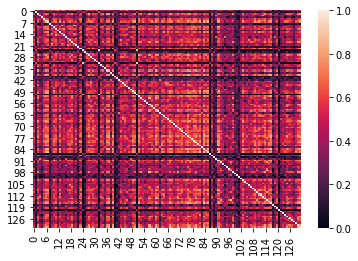

In [116]:
sns.heatmap(similarity_mat)